In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

https://www.kaggle.com/uciml/mushroom-classification
About this file
Attribute Information: 

(classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [2]:
data = pd.read_csv('mushrooms.csv')
pd.set_option('display.max_column',23)
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [3]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [4]:
print(data['veil-type'].value_counts()) # --> veil type jangan dipake
print(data['veil-color'].value_counts())
print(data['ring-number'].value_counts())
print(data['stalk-surface-above-ring'].value_counts())
print(data['gill-attachment'].value_counts())
data['class'].value_counts()


p    8124
Name: veil-type, dtype: int64
w    7924
n      96
o      96
y       8
Name: veil-color, dtype: int64
o    7488
t     600
n      36
Name: ring-number, dtype: int64
s    5176
k    2372
f     552
y      24
Name: stalk-surface-above-ring, dtype: int64
f    7914
a     210
Name: gill-attachment, dtype: int64


e    4208
p    3916
Name: class, dtype: int64

In [5]:
data['class'] = np.where(data['class']=='p',1,0)

In [6]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
data_dummy = pd.get_dummies(data[['class','bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring','ring-type', 'spore-print-color']], drop_first = True)
pd.set_option('display.max_column',96)
data_dummy
#hapus cap-shape, population, cap color

,class,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,stalk-shape_t,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y
0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
3,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
8120,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
8121,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
8122,1,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [8]:
data_dummy.corr(method = 'spearman')

,class,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,stalk-shape_t,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y
class,1.000000,-0.501530,0.161278,0.623842,-0.219529,0.069159,-0.785557,0.186984,0.286360,0.286360,0.129200,-0.348387,0.540024,-0.102019,0.017712,-0.218548,-0.202839,-0.150087,0.587658,-0.491314,-0.016198,0.573524,-0.425444,-0.081674,-0.074371,0.451619,0.069159,-0.540469,0.490229,-0.396832,-0.416645,-0.074371,0.098024,-0.074371,0.357384,-0.074371
bruises_t,-0.501530,1.000000,-0.131191,-0.344642,0.269875,-0.056257,0.285171,0.213915,-0.232938,-0.232938,0.137359,-0.299473,-0.369596,0.099364,0.327940,0.277916,-0.151727,0.184507,-0.541494,0.561572,-0.045900,-0.530549,0.505796,0.100605,-0.065008,-0.367368,-0.056257,0.767036,-0.243244,0.335756,0.334734,-0.065008,0.112142,0.091427,-0.416877,-0.065008
odor_c,0.161278,-0.131191,1.000000,-0.093630,-0.035405,-0.010380,-0.136312,-0.028064,-0.042979,-0.042979,0.025344,0.143116,0.232546,-0.178111,0.166951,-0.042170,-0.062215,-0.024206,-0.099910,0.117416,-0.008469,-0.097890,0.125035,-0.029611,-0.011994,-0.067782,-0.010380,0.159225,-0.078006,0.099596,0.093600,-0.011994,-0.014712,-0.011994,-0.100386,-0.011994
odor_f,0.623842,-0.344642,-0.093630,1.000000,-0.136952,-0.040150,-0.527269,-0.108554,-0.166247,-0.166247,0.098032,-0.264112,-0.055394,-0.203098,0.324020,-0.163119,-0.240655,-0.093630,0.584189,-0.547107,-0.032758,0.600449,-0.502339,-0.114541,-0.046396,0.723932,-0.040150,-0.427514,0.799752,-0.329307,-0.340268,-0.046396,-0.056908,-0.046396,-0.036033,-0.046396
odor_l,-0.219529,0.269875,-0.035405,-0.136952,1.000000,-0.015182,-0.199381,-0.041048,-0.062864,-0.062864,0.037070,-0.025662,-0.093164,-0.205404,-0.157319,0.515126,-0.091001,0.324135,-0.146136,0.171742,-0.012387,-0.143182,0.071034,0.254041,-0.017544,-0.099144,-0.015182,0.232895,-0.114098,0.113253,0.136906,-0.017544,-0.021519,0.160616,-0.146832,-0.017544
odor_m,0.069159,-0.056257,-0.010380,-0.040150,-0.015182,1.000000,-0.058453,-0.012034,-0.018430,-0.018430,-0.199347,-0.029279,-0.044636,-0.076377,-0.062173,0.246141,-0.026679,-0.010380,0.103892,-0.088402,-0.003632,-0.041977,-0.083015,0.350534,-0.005143,-0.029066,1.000000,-0.065190,-0.033450,-0.036507,-0.037722,-0.005143,-0.006309,-0.005143,0.103399,-0.005143
odor_n,-0.785557,0.285171,-0.136312,-0.527269,-0.199381,-0.058453,1.000000,-0.158038,-0.242030,-0.242030,-0.157755,0.371333,-0.457211,0.248052,0.131549,-0.229609,0.272012,-0.136312,-0.466499,0.347192,0.062128,-0.471920,0.370483,-0.091038,0.087993,-0.381707,-0.058453,0.352151,-0.409532,0.284868,0.283649,0.087993,0.107929,-0.067546,-0.225154,0.087993
odor_p,0.186984,0.213915,-0.028064,-0.108554,-0.041048,-0.012034,-0.158038,1.000000,-0.049829,-0.049829,0.029383,-0.079162,0.269611,-0.206500,-0.168097,-0.048892,0.451078,-0.028064,-0.115834,0.136130,-0.009819,-0.113493,0.144964,-0.034331,-0.013906,-0.078586,-0.012034,0.184603,-0.090440,0.115470,0.108518,-0.013906,-0.017057,-0.013906,-0.116386,-0.013906
odor_s,0.286360,-0.232938,-0.042979,-0.166247,-0.062864,-0.018430,-0.242030,-0.049829,1.000000,-0.076312,0.044999,-0.121234,0.412899,0.241303,-0.257434,-0.074876,-0.110467,-0.042979,0.126391,-0.078781,-0.015037,0.132621,-0.060864,-0.052577,-0.021297,-0.120351,-0.018430,-0.269925,-0.138505,-0.151161,-0.156192,-0.021297,-0.026122,-0.021297,0.428137,-0.021297
odor_y,0.286360,-0.232938,-0.042979,-0.166247,-0.062864,-0.018430,-0.242030,-0.049829,-0.076312,1.000000,0.044999,-0.121234,0.412899,0.241303,-0.257434,-0.074876,-0.110467,-0.042979,0.126391,-0.078781,-0.015037,0.132621,-0.060864,-0.052577,-0.02129

In [9]:
data_dummy.columns

Index(['class', 'bruises_t', 'odor_c', 'odor_f', 'odor_l', 'odor_m', 'odor_n',
       'odor_p', 'odor_s', 'odor_y', 'gill-attachment_f', 'gill-spacing_w',
       'gill-size_n', 'stalk-shape_t', 'stalk-root_b', 'stalk-root_c',
       'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_k',
       'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y',
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-surface-below-ring_y', 'ring-type_f', 'ring-type_l',
       'ring-type_n', 'ring-type_p', 'spore-print-color_h',
       'spore-print-color_k', 'spore-print-color_n', 'spore-print-color_o',
       'spore-print-color_r', 'spore-print-color_u', 'spore-print-color_w',
       'spore-print-color_y'],
      dtype='object')

In [10]:
X = data_dummy[['bruises_t', 'gill-attachment_f', 'gill-spacing_w',
       'gill-size_n', 'stalk-shape_t']]
y = data_dummy[['class']]

In [11]:
X_train, X_test, y_train, y_test =train_test_split(
    X,
    y,
    stratify = y,
    test_size = 0.2,
    random_state = 0
)

# LOGISTIC REGRESSION

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lr = LogisticRegression().fit(X_train, y_train)
print("lr.coef_ : {}".format(lr.coef_))
print("lr.intercept_ : {}".format(lr.intercept_))
print("Training set score : {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score : {:.2f}".format(lr.score(X_test,y_test)))

lr.coef_ : [[-3.67114909  4.20121723 -4.92827241  2.56507158 -0.22941055]]
lr.intercept_ : [-2.15348757]
Training set score : 0.92
Test set score : 0.91


C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


# RIDGE REGRESSION

In [14]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,y_train)
print("Training set score : {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score : {:.2f}".format(ridge.score(X_test,y_test)))

Training set score : 0.65
Test set score : 0.62


# LOGISTIC REGRESSION

In [15]:
fitur = data_dummy[['bruises_t', 'gill-attachment_f', 'gill-spacing_w',
       'gill-size_n', 'stalk-shape_t']]
target = data_dummy[['class']]
#hapus odor, stalk root, stalk-surface, spore-print-color, ring-type

In [16]:
model_logit = sm.Logit(target, sm.add_constant(fitur))
model_logit

C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [17]:
hasil = model_logit.fit(method = 'bfgs')
# hasil = LinearRegression().fit(X_train,Y_train)

         Current function value: 0.289902
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [18]:
print(hasil.summary())

                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                 8124
Model:                          Logit   Df Residuals:                     8118
Method:                           MLE   Df Model:                            5
Date:                Tue, 14 Sep 2021   Pseudo R-squ.:                  0.5814
Time:                        21:57:21   Log-Likelihood:                -2355.2
converged:                      False   LL-Null:                       -5625.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.9625      0.210     -9.347      0.000      -2.374      -1.551
bruises_t            -3.7950      0.101    -37.623      0.000      -3.993      -3.597
gill-attachment_f     4.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   int32 
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# KNN

In [20]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print(f"Test set predictions : {clf.predict(X_test)}")
print('Test set accuracy : {:.2f}'.format(clf.score(X_test, y_test)))

Test set predictions : [0 0 0 ... 0 0 1]
Test set accuracy : 0.92


C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# KNN WITH SCALING

In [21]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
X_train_scaled[:10]

array([[0., 1., 0., 1., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 1.],
       [1., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 1., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 1., 1.],
       [0., 1., 0., 0., 0.],
       [1., 1., 0., 0., 1.]])

In [23]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_scaled, y_train)

C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [24]:
y_predict_class_transform = knn.predict(X_test_scaled)

In [25]:
print(confusion_matrix(y_test, y_predict_class_transform))
print(classification_report(y_test, y_predict_class_transform))
print ('Akurasi Model Adalah : ', round(accuracy_score(y_test, y_predict_class_transform)*100,2))

[[797  45]
 [ 79 704]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       842
           1       0.94      0.90      0.92       783

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625

Akurasi Model Adalah :  92.37


In [26]:
k = range(1,30,2)
testing_accuracies = []
training_accuracies = []

In [27]:
score = 0

for i in k:
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train_scaled,y_train)

  y_predict_train = knn.predict(X_train_scaled)
  training_accuracies.append(accuracy_score(y_train,y_predict_train))

  y_predict_test = knn.predict(X_test_scaled)
  acc_score = accuracy_score(y_test,y_predict_test)
  testing_accuracies.append(acc_score)

  if score < acc_score:
    score = acc_score
    best_k = i

C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

In [28]:
print("best K : ",best_k)
print('Akurasi : ',round(score*100,2))

best K :  19
Akurasi :  93.23


C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:

([<matplotlib.axis.XTick at 0x20fa91e7130>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

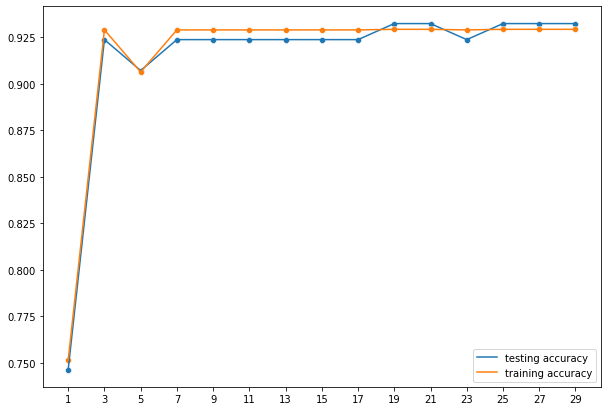

In [29]:
plt.figure(figsize = (10,7))
sns.lineplot(k,testing_accuracies)
sns.scatterplot(k,testing_accuracies)
sns.lineplot(k,training_accuracies)
sns.scatterplot(k,training_accuracies)
plt.legend(['testing accuracy','training accuracy'])
plt.xticks(list(k))

# DECISION TREE

In [30]:
tree = DecisionTreeClassifier( max_depth = 3 )
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [31]:
pred = tree.predict(X_test_scaled)
pred

array([0, 0, 0, ..., 0, 0, 1])

In [32]:
print(confusion_matrix(y_test, pred))

[[766  76]
 [ 75 708]]


In [33]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       842
           1       0.90      0.90      0.90       783

    accuracy                           0.91      1625
   macro avg       0.91      0.91      0.91      1625
weighted avg       0.91      0.91      0.91      1625



In [34]:
from sklearn.tree import plot_tree

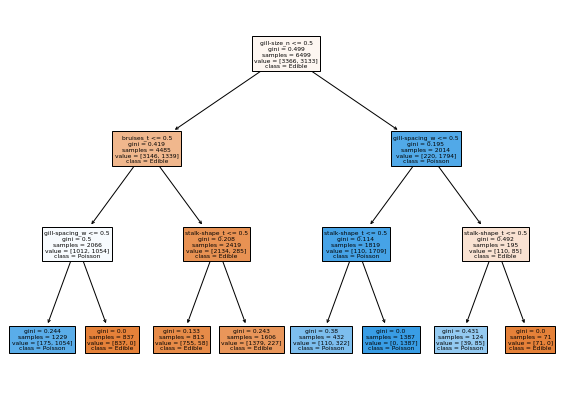

In [35]:
plt.figure(figsize=(10,7))
plot_tree(tree, feature_names = list(X), class_names = ['Edible', 'Poisson'], filled= True)
plt.show()

<AxesSubplot:>

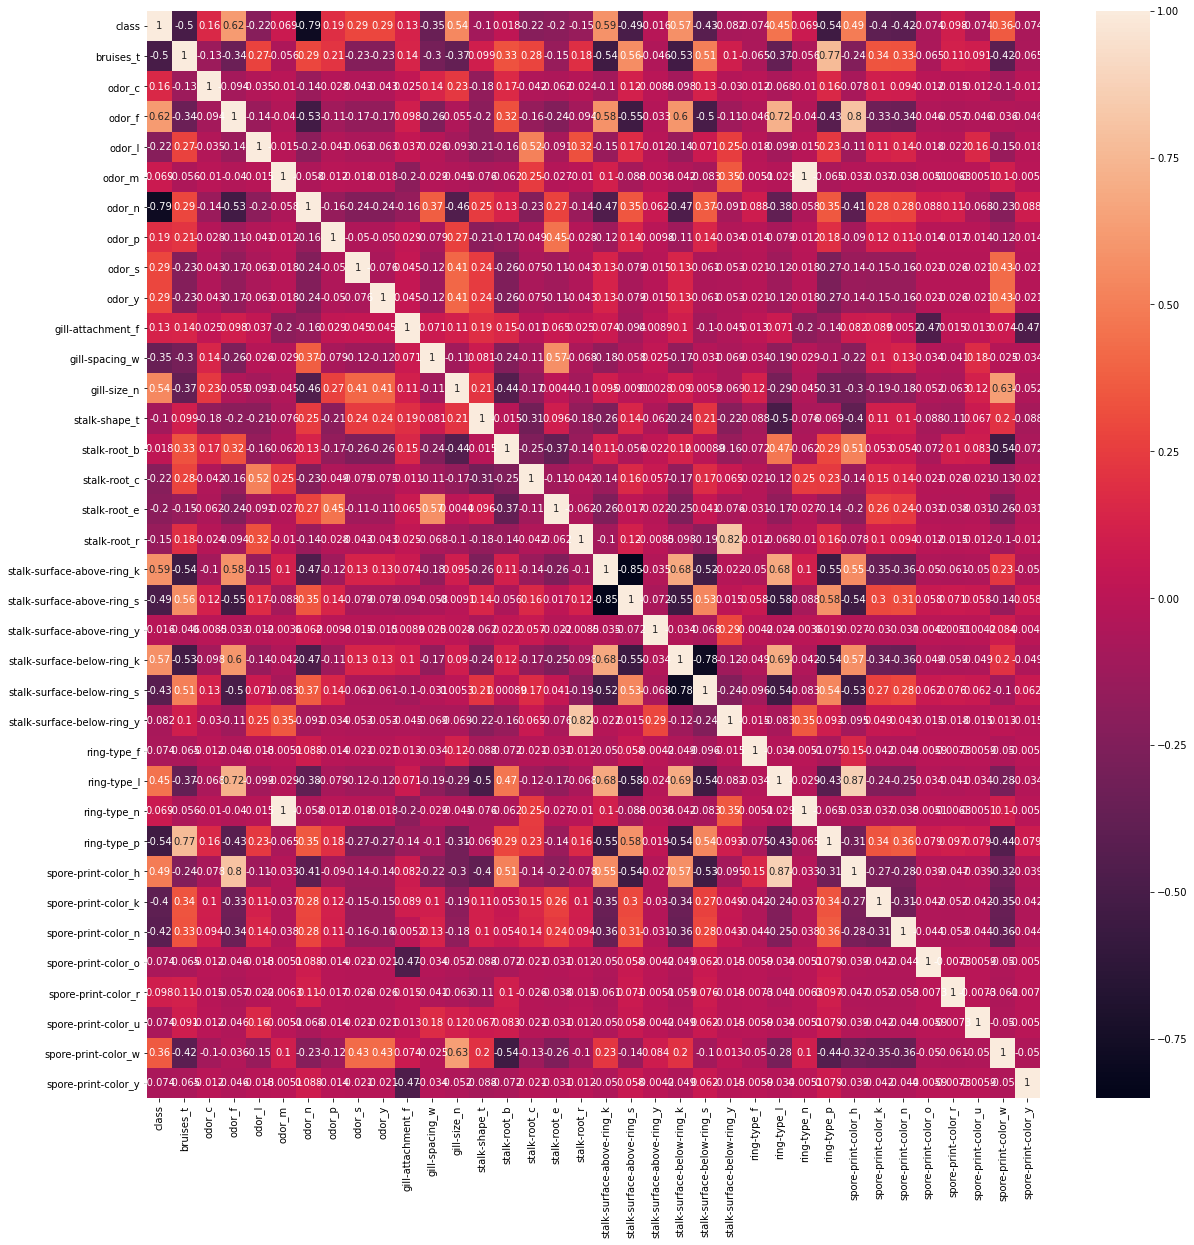

In [36]:
plt.figure(figsize = (20,20))
sns.heatmap(data_dummy.corr(),annot=True)

In [37]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print('Accuracy on training set : {:.3f}'.format(tree.score(X_train,y_train)))
print('Accuracy on test set : {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on training set : 0.929
Accuracy on test set : 0.932


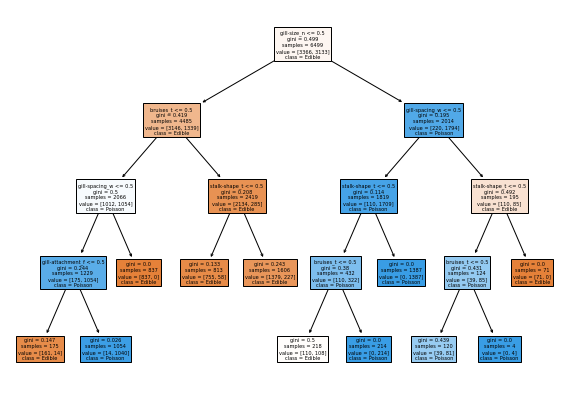

In [38]:
plt.figure(figsize=(10,7))
plot_tree(tree, feature_names = list(X), class_names = ['Edible', 'Poisson'], filled= True)
plt.show()

In [39]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print('Accuracy on training set : {:.3f}'.format(tree.score(X_train,y_train)))
print('Accuracy on test set : {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on training set : 0.929
Accuracy on test set : 0.932


In [40]:
depths = range(1,25)
testing_accuracies_tree = []
training_accuracies_tree = []
score = 0

for i in depths :
    tree = DecisionTreeClassifier(
        criterion = 'gini',
        max_depth = i)
    tree.fit(X_train, y_train)

    y_predict_train_tree = tree.predict(X_train)
    training_accuracies_tree.append(accuracy_score(y_train, y_predict_train_tree))

    y_predict_test_tree = tree.predict(X_test)
    acc_score = accuracy_score(y_test, y_predict_test_tree)
    testing_accuracies_tree.append(acc_score)

    if score < acc_score :
        score = acc_score
        best_depth = i

In [41]:
print(best_depth)

4


In [42]:
print(score)

0.9323076923076923


In [43]:
tree = DecisionTreeClassifier(random_state=0, max_depth=4)
tree.fit(X_train,y_train)
print('Accuracy on training set : {:.3f}'.format(tree.score(X_train,y_train)))
print('Accuracy on test set : {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on training set : 0.929
Accuracy on test set : 0.932
